### Preprocessing

In [1]:
import os
import numpy as np
import xarray as xr
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# please specify data path
datapath = '/mnt/d/NLeSC/BETA/EUCP/CPM/DEMOSTRATOR'
output_path = '../static'

In [3]:
# load data
resolution = '3KM'
variable = 'pr'
region = 'ALP'
category = 'FREQ'
dataset = xr.open_dataset(Path(datapath,f'{resolution}',
                          f'{variable}_{region}_00275EU_historical_ENSEMBLE_1hr_1996-2005_{category}.nc'))
dataset

<xarray.Dataset>
Dimensions:    (lon: 786, lat: 567, bin: 1, bnds: 2, time: 4)
Coordinates:
  * lon        (lon) float32 -3.0 -2.973 -2.945 -2.918 ... 18.53 18.56 18.59
  * lat        (lat) float32 37.7 37.73 37.76 37.78 ... 53.18 53.21 53.24 53.27
  * bin        (bin) float64 0.1
  * time       (time) object 2006-01-01 00:00:00 ... 2005-11-30 23:00:00
Dimensions without coordinates: bnds
Data variables:
    bin_bnds   (bin, bnds) float64 ...
    time_bnds  (time, bnds) object ...
    pr         (time, bin, lat, lon) float32 ...
Attributes: (12/135)
    CDI:                                       Climate Data Interface version...
    history:                                   Sat Dec 14 23:31:00 2019: cdo ...
    source:                                    RegCM Model output file
    institution:                               ICTP
    Conventions:                               CF-1.7
    title:                                     ICTP Regional Climatic model V4
    ...                                        ...
    holtslag_th10_estimate:                    1
    holtslag_th10_maximize:                    1
    holtslag_th10_niteration:                  1
    NCO:                                       "4.6.3"
    nco_openmp_thread_number:                  1
    CDO:                                       Climate Data Operators version...

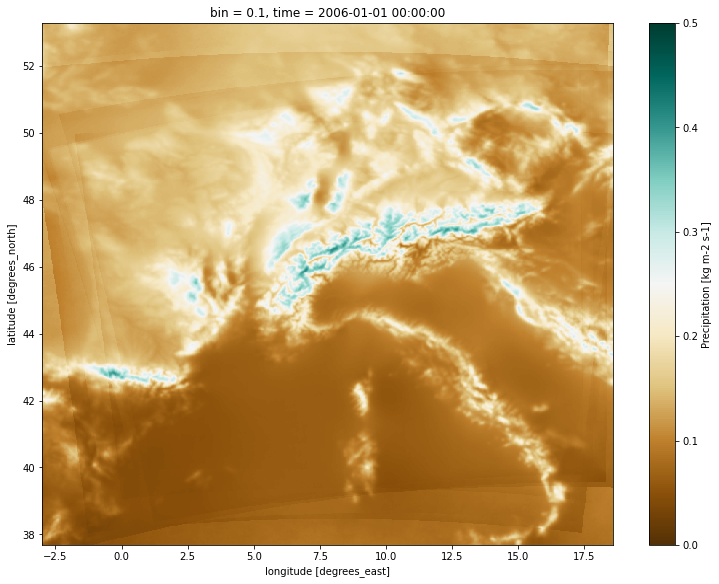

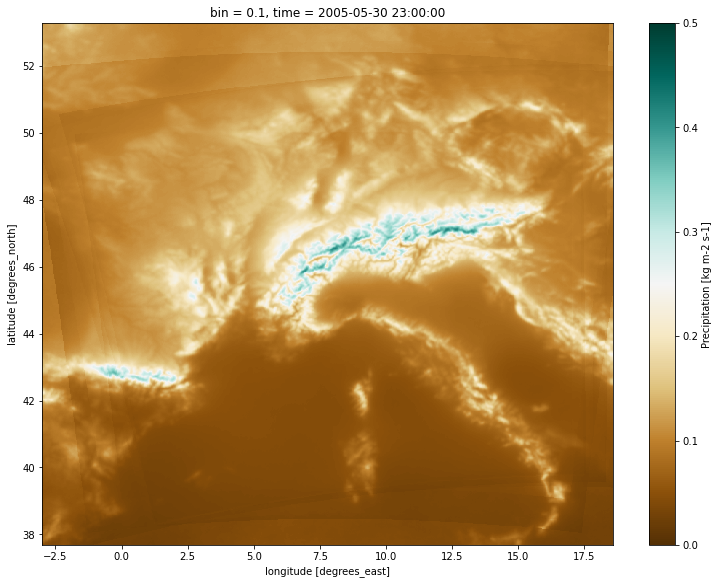

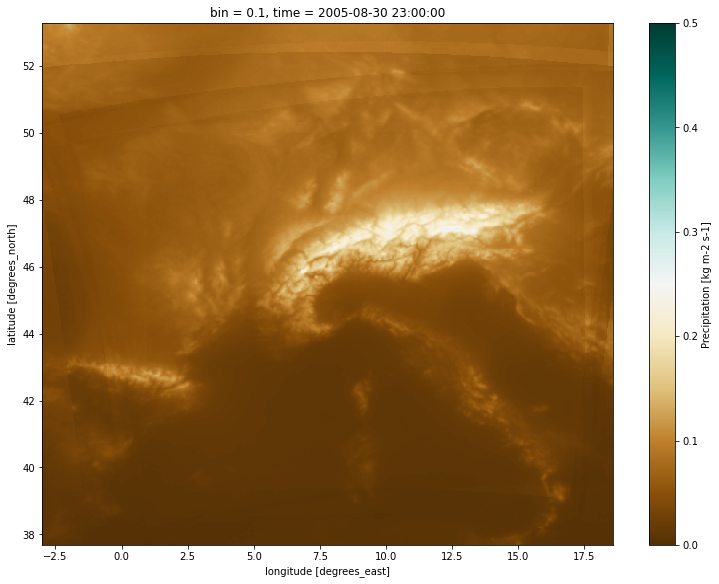

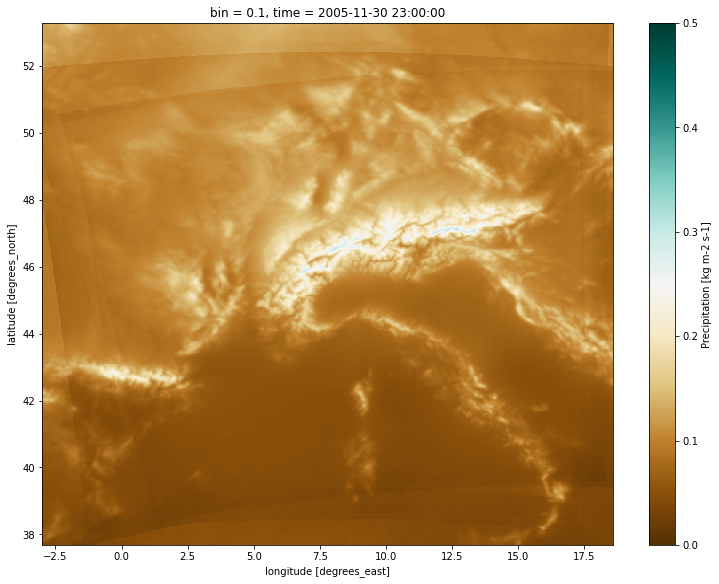

In [4]:
for i in dataset.indexes['time']:
    data = dataset['pr'].sel(time=i)
    fig = plt.figure(figsize=(12.8, 9.6))
    ax = plt.axes()
    data.plot(cmap="BrBG", vmin=0, vmax=0.5)
    plt.show()
    fig.savefig(Path(output_path,
                f"{region}_{variable}_{resolution}_{category}_{str(i)[:10]}.png"),
                dpi=150)
